In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.rand(len(x_data))

y = mx + b

b = 5


In [4]:
y_true = (0.5 * x_data) + 5 + noise

In [5]:
x_df = pd.DataFrame(x_data,columns=['X Data'])
y_df = pd.DataFrame(y_true,columns=['Y'])

In [6]:
my_data = pd.concat([x_df,y_df],axis=1)

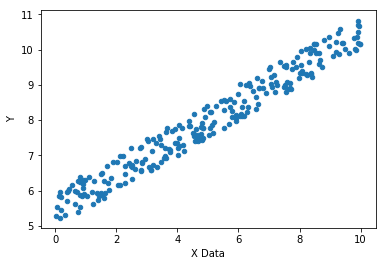

In [7]:
my_data.sample(250).plot(kind = 'scatter', x = 'X Data', y = 'Y')

In [8]:
batch_size = 8

In [9]:
m = tf.Variable(np.random.randn(2)[0])
b = tf.Variable(np.random.randn(2)[1])
m ,b 

(<tf.Variable 'Variable:0' shape=() dtype=float64_ref>,
 <tf.Variable 'Variable_1:0' shape=() dtype=float64_ref>)

In [10]:
xph = tf.placeholder(tf.float64,[batch_size])

In [11]:
yph = tf.placeholder(tf.float64,[batch_size]) 

In [12]:
y_model = m*xph + b

In [13]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [14]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [15]:
train = optimizer.minimize(error)

In [16]:
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    
    for i in range(batches):
        rand_int = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_int],yph:y_true[rand_int]}
        sess.run(train,feed_dict=feed)
    model_m, model_b = sess.run([m,b])

In [23]:
model_m,model_b

(0.50646273552717347, 5.4889020741368899)

In [24]:
y_hat = x_data*model_m + model_b

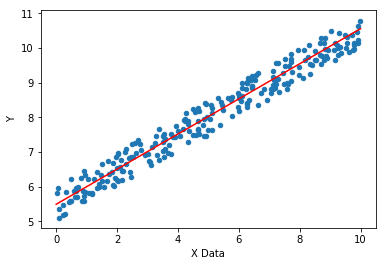

In [25]:
my_data.sample(250).plot(kind='scatter',x='X Data', y = 'Y')
plt.plot(x_data,y_hat,'r')